In [6]:
pip install numpy pandas matplotlib yfinance

In [7]:
import yfinance as yf
import pandas as pd

# Define the assets
assets = ['AAPL', 'MSFT', 'GOOGL']

# Fetch historical price data for the last 1 year
data = yf.download(assets, start='2023-01-01', end='2024-01-01')['Adj Close']
print(data.head())

[*********************100%***********************]  3 of 3 completed

Ticker                           AAPL      GOOGL        MSFT
Date                                                        
2023-01-03 00:00:00+00:00  123.904625  88.899872  236.183517
2023-01-04 00:00:00+00:00  125.182610  87.862434  225.852112
2023-01-05 00:00:00+00:00  123.855095  85.987083  219.158356
2023-01-06 00:00:00+00:00  128.412216  87.124260  221.741196
2023-01-09 00:00:00+00:00  128.937286  87.802582  223.900177


In [8]:
# Calculate daily returns
returns = data.pct_change().dropna()
print(returns.head())

Ticker                         AAPL     GOOGL      MSFT
Date                                                   
2023-01-04 00:00:00+00:00  0.010314 -0.011670 -0.043743
2023-01-05 00:00:00+00:00 -0.010605 -0.021344 -0.029638
2023-01-06 00:00:00+00:00  0.036794  0.013225  0.011785
2023-01-09 00:00:00+00:00  0.004089  0.007786  0.009736
2023-01-10 00:00:00+00:00  0.004456  0.004544  0.007617


In [9]:
# Calculate expected returns and covariance matrix
expected_returns = returns.mean() * 252  # Annualize the mean returns
cov_matrix = returns.cov() * 252  # Annualize the covariance matrix
print("Expected Returns:\n", expected_returns)
print("\nCovariance Matrix:\n", cov_matrix)

Expected Returns:
 Ticker
AAPL     0.462402
GOOGL    0.501407
MSFT     0.496859
dtype: float64

Covariance Matrix:
 Ticker      AAPL     GOOGL      MSFT
Ticker                              
AAPL    0.039818  0.032044  0.027468
GOOGL   0.032044  0.092405  0.038936
MSFT    0.027468  0.038936  0.063103


In [10]:
import numpy as np

def portfolio_performance(weights, expected_returns, cov_matrix):
    portfolio_return = np.sum(expected_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_std_dev

def negative_sharpe(weights, expected_returns, cov_matrix, risk_free_rate=0.01):
    portfolio_return, portfolio_std_dev = portfolio_performance(weights, expected_returns, cov_matrix)
    return -(portfolio_return - risk_free_rate) / portfolio_std_dev  # Negative Sharpe ratio

# Optimize portfolio weights
from scipy.optimize import minimize

num_assets = len(assets)
args = (expected_returns, cov_matrix)

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Sum of weights must be 1
bounds = tuple((0, 1) for _ in range(num_assets))  # No short selling

# Initial guess (equal distribution)
initial_weights = num_assets * [1. / num_assets,]

optimal_solution = minimize(negative_sharpe, initial_weights, args=args, 
                             method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimal_solution.x
print("\nOptimal Weights:\n", optimal_weights)


Optimal Weights:
 [0.63821833 0.07981002 0.28197165]


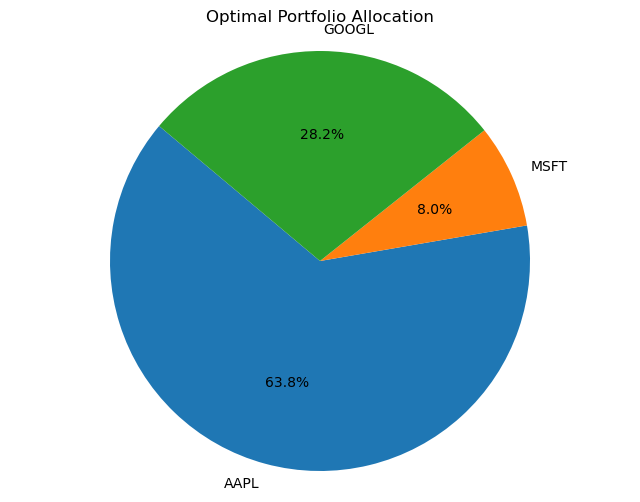

In [11]:
import matplotlib.pyplot as plt

def plot_portfolio_weights(weights, assets):
    plt.figure(figsize=(8, 6))
    plt.pie(weights, labels=assets, autopct='%1.1f%%', startangle=140)
    plt.title('Optimal Portfolio Allocation')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle
    plt.show()

# Plot the optimal portfolio weights
plot_portfolio_weights(optimal_weights, assets)